<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Regression: Exercise</h2>
<div>

In [206]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler

In [2]:
def genarate_data_1d(points, min, max, fn, noise, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(low=min, high=max, size=(points, 1))
    np.random.seed(seed)
    y = fn(x[:,0]) + np.random.normal(scale=noise, size=points)
    return x, y

def plot(x, y, pred_x=None, pred_y=None, ax=plt):
    ax.plot(x, y, '.', label='data')
    if pred_x is not None:
        ax.plot(pred_x, pred_y, '.', color='r', label='our function')
    ax.legend();

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise solved</strong>
  <p>Train a linear model to fit the data</p>
<div>

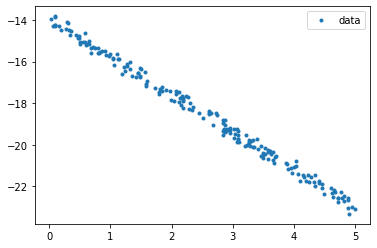

In [3]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=lambda x: -x*1.8 - 14, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

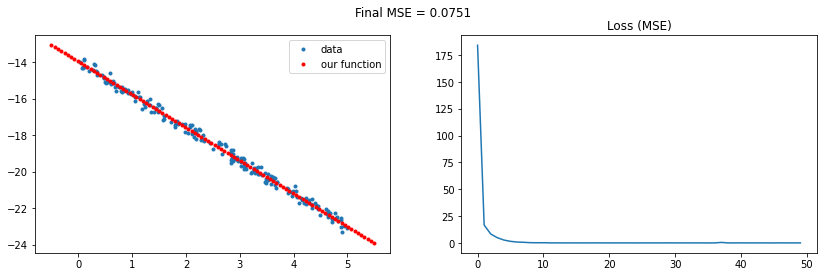

In [4]:
inp = keras.Input(shape=(1,))
out = layers.Dense(1, name='regression')(inp)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=50, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 1</strong>
  <p>Train a MLP in less than 100 epochs to get a MSE lower than 0.1</p>
<div>

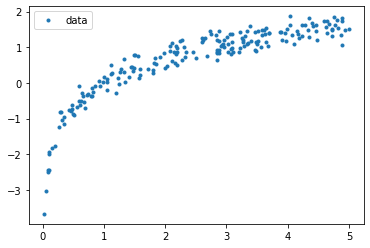

In [346]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=np.log, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

In [347]:
inputs  = keras.Input(shape=(1,))
l1      = layers.Dense(10, activation='relu', name='dense_1')(inputs)
l2      = layers.Dense(10, activation='sigmoid', name='dense_2')(l1)
outputs = layers.Dense(1, name='regression')(l2)

In [348]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [349]:
model.compile(loss='mse', optimizer=optimizers.SGD(0.09))
hist = model.fit(x, y, epochs=99, batch_size=32, verbose=0)

In [350]:
pred_y = model.predict(pred_x)

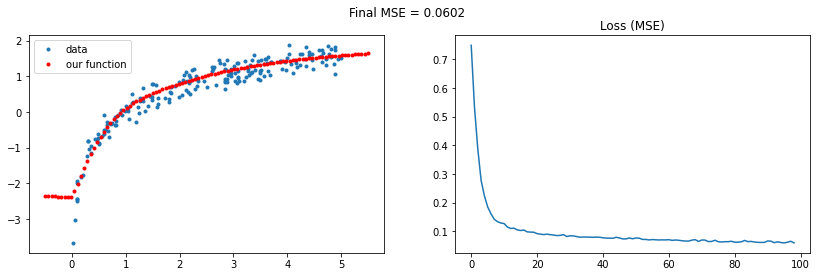

In [351]:
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 2</strong>
  <p>Train a MLP in less than 100 epochs to get a loss lower than 0.06</p>
<div>

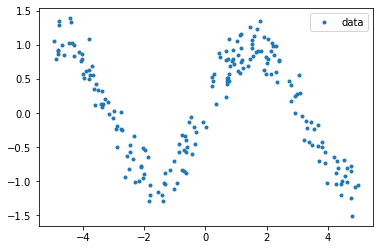

In [175]:
x,y = genarate_data_1d(points=200, min=-5, max=5, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-5.5, stop=5.5, num=100)

plot(x,y)

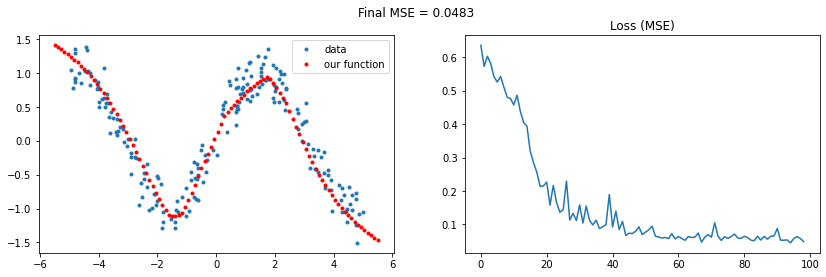

In [204]:
inputs  = keras.Input(shape=(1,))
l1      = layers.Dense(10, activation='relu', name='dense_1')(inputs)
l2      = layers.Dense(10, activation='relu', name='dense_2')(l1)
l3      = layers.Dense(10, activation='sigmoid', name='dense_3')(l2)
outputs = layers.Dense(1, name='regression')(l3)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=99, batch_size=16, verbose=0)
pred_y = model.predict(pred_x)
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 3</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Hint: <strong style="color:#01ff84">Standard scale</strong> the data.</p>
<div>

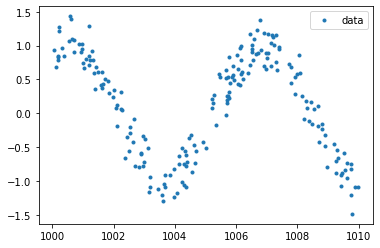

In [321]:
x,y = genarate_data_1d(points=200, min=1000, max=1010, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-2, stop=2, num=100)

plot(x,y)

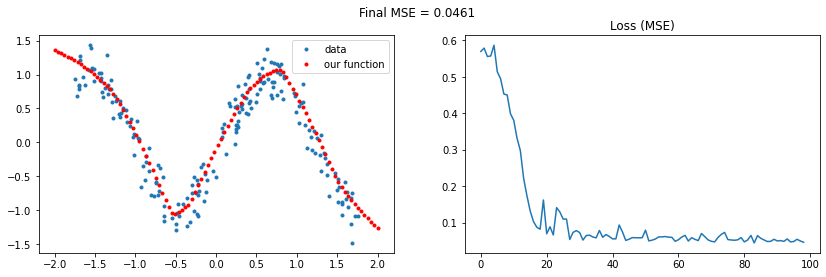

In [322]:
sc = StandardScaler()
x = sc.fit_transform(x)
inputs  = keras.Input(shape=(1,))
l1      = layers.Dense(10, activation='relu', name='dense_1')(inputs)
l2      = layers.Dense(10, activation='relu', name='dense_2')(l1)
l3      = layers.Dense(10, activation='sigmoid', name='dense_3')(l2)
outputs = layers.Dense(1, name='regression')(l3)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=99, batch_size=16, verbose=0)
pred_y = model.predict(pred_x)
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 4</strong>
  <p>Train a MLP to fit the data</p>
<div>

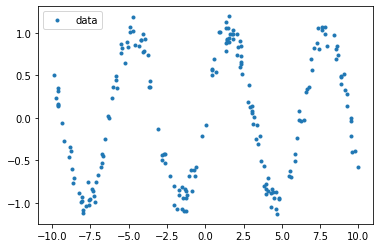

In [264]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=np.sin,  noise=0.1)
pred_x = np.linspace(start=-2, stop=2, num=200)

plot(x,y)

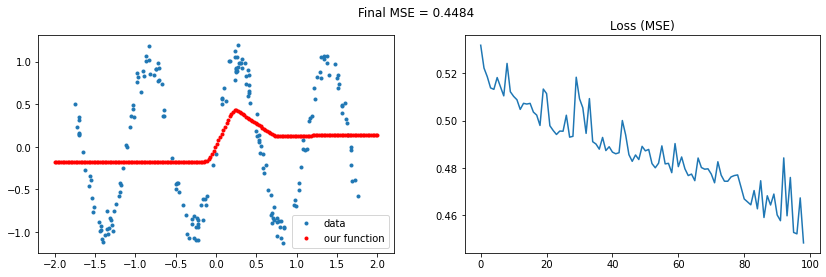

In [320]:
sc = StandardScaler()
x = sc.fit_transform(x)
inputs  = keras.Input(shape=(1,))
l1      = layers.Dense(2, activation='relu', name='dense_1')(inputs)
l2      = layers.Dense(8, activation='relu', name='dense_2')(l1)
l3      = layers.Dense(18, activation='relu', name='dense_3')(l2)
l4      = layers.Dense(32, activation='relu', name='dense_4')(l3)
l5      = layers.Dense(18, activation='relu', name='dense_5')(l4)
l6      = layers.Dense(8, activation='sigmoid', name='dense_6')(l5)
outputs = layers.Dense(1, name='regression')(l5)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse', optimizer=optimizers.SGD(0.05))
hist = model.fit(x, y, epochs=99, batch_size=64, verbose=0)
pred_y = model.predict(pred_x)
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

In [ ]:
#adding more layers doesn't help everytime

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 5</strong>
  <p>Train a MLP to fit the data</p>
<div>

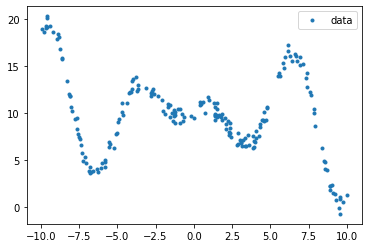

In [236]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=lambda x: np.cos(x)*x+10, noise=0.5)
pred_x = np.linspace(start=-2, stop=2, num=200)

plot(x,y)

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 6</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Train a LGBMRegressor to fit the data and visualize the predictions</p>
<div>

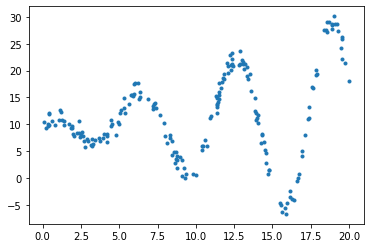

In [10]:
x,y = genarate_data_1d(points=200, min=0, max=20, fn=lambda x: np.cos(x)*x+10, noise=1)
pred_x = np.linspace(start=-2, stop=2, num=200).reshape(200,-1)

plt.plot(x,y,".");